<a href="https://colab.research.google.com/github/MiguelGironUNMSM/Python_Quimica/blob/main/Quimica_PC12_Cin%C3%A9tica_Quimica_Miguel_Giron_Altamirano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Please run cell below to install the required pacakages

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 9.7 MB/s eta 0:00:00


# Creating structures from SMILES

Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [2]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

Let us see how to visualize the 2D structure of toluene using SMILES

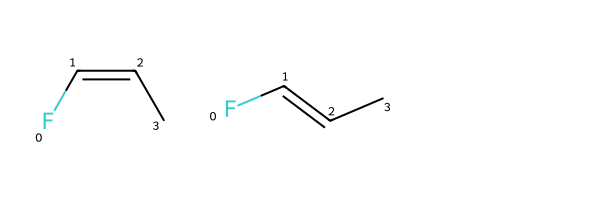

In [3]:
# set SMILES for toluene
smiles1 = "F\C=C/C"
smiles2 = "F/C=C/C"
# Convert to RDKit molecule
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)
# Draw the strucutre
Draw.MolsToGridImage([mol1,mol2])


The structure generated has implicit hydrogen atoms. We will need explicit hydrogen atoms to generate the input structure

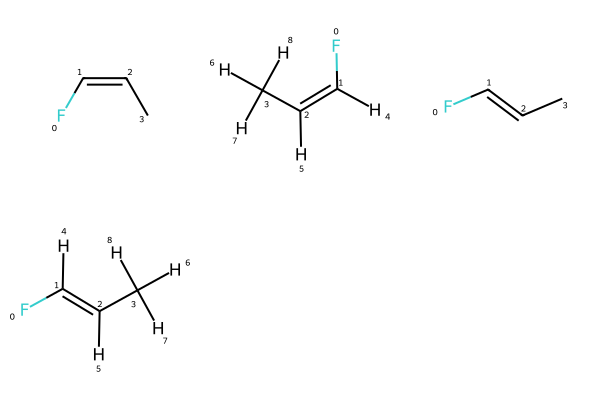

In [4]:
# Add hydrogens
mol1_h = Chem.AddHs(mol1)
mol2_h = Chem.AddHs(mol2)
# Display both structures
Draw.MolsToGridImage([mol1, mol1_h,mol2, mol2_h], subImgSize=(200,200))

The input to a quantum chemistry calculation is a 3D structure. Adding x,y,z coordinates to each atom generates a conformer. The section below generates one confomer.

In [ ]:
# The current molecule has z = 0 for all atoms

# This is a 2D molecule
print(Chem.MolToMolBlock(mol1_h))
print(Chem.MolToMolBlock(mol2_h))

In [ ]:
# Let us make it 3D by generating a random conformer
# Hacmeos que la Molecula esta en 3D
Chem.AllChem.EmbedMolecule(mol1_h)
Chem.AllChem.EmbedMolecule(mol2_h)
# Verificamos que este en 3D
# look at the molecule again
print(Chem.MolToMolBlock(mol1_h))
print(Chem.MolToMolBlock(mol2_h))

In [7]:
# Save the molecule in XYZ format for future use
#Guardamos la Info 3d en un archivo
Chem.MolToXYZFile(mol1_h,"mol1.xyz")
Chem.MolToXYZFile(mol1_h,"mol2.xyz")

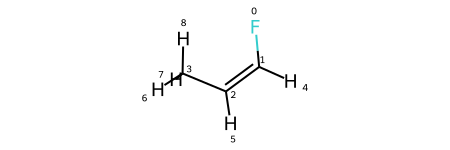

In [8]:
mol1_h

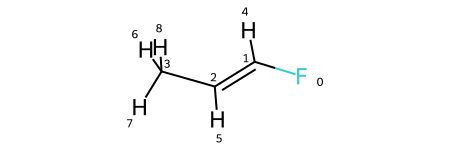

In [9]:
mol2_h

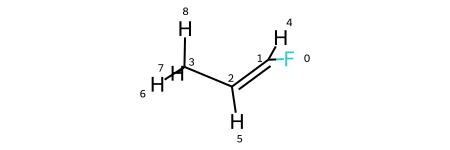

In [10]:

# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(mol1_h.GetConformer(0),3,2,1,0,90.0)

# save the new conformer
#Estado de Transición
Chem.MolToXYZFile(mol1_h, "moltran.xyz")

# Looks like it is set to 90
mol1_h


In [11]:
# import the package
from pyscf import gto, scf

In [12]:
mol1 = gto.M(atom="mol1.xyz")

In [ ]:

mol1.basis = "3-21G"

mf = mol1.KS()
mf.xc = 'b3lyp'

mf.kernel()

In [14]:
moltran = gto.M(atom="moltran.xyz")

In [ ]:
moltran.basis = "3-21G"

mft = moltran.KS()
mft.xc = 'b3lyp'

mft.kernel()

In [16]:
mol2 = gto.M(atom="mol2.xyz")

In [ ]:
mol2.basis = "3-21G"

mf2 = mol2.KS()
mf2.xc = 'b3lyp'

mf2.kernel()

In [ ]:
! pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

import matplotlib.pyplot as plt
from energydiagram import ED


In [ ]:
diagram = ED()
diagram.add_level(-214.251651928337,'Cis')
diagram.add_level(-214.087978179134,'TS',color='g')
diagram.add_level(-214.251651928337,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel